# Homework 1

## *Xi Chen*
Netid: xc166

## 1) Bayesian statistics
**(2 point)** 

Suppose that we have three coloured boxes r (red), b (blue), and g (green).
Box r contains 3 apples, 4 oranges, and 3 limes, box b contains 1 apple, 1 orange,
and 0 limes, and box g contains 3 apples, 3 oranges, and 4 limes. 

**(a)** If a box is chosen
at random with probabilities p(r) = 0.2, p(b) = 0.2, p(g) = 0.6, and a piece of
fruit is removed from the box (with equal probability of selecting any of the items in
the box), then what is the probability of selecting an apple?

**(b)** If we observe that the
selected fruit is in fact an orange, what is the probability that it came from the green
box?

Explain your reasoning.

**ANSWER**

(a) 
we assume the probability of selecting an apple as event A

p(A)=0.2 * 0.3+0.2 * 0.5+0.6 * 0.3=0.34

The 0.2/0.2/0.6 refer to the probability of selecting box r/g/b respectively
And the latter part 0.3/0.5/0.3 refer to the probability of selecting an apple within the certain box.

(b)
The probability of selecting an orange given that it came from the green box is 3/10.

p(g|orange) = p(orange|g) * p(g) / p(orange)

And p(g) = 0.6, and p(orange) is given by:

p(orange) = p(r|orange) * p(r) + p(b|orange) * p(b) + p(g|orange) * p(g) = (4/10) * 0.2 + (1/2) * 0.2 + (3/10) * 0.6 = 0.36

So:

p(g|orange) = (3/10) * 0.6 / 0.36 = 0.5

The probability that the orange came from the green box is 0.5.

## 2) Bias-variance tradeoff for the kNN classifier

**(5 points total)**


**(a)** use the scikit-learn function make_moons to create a dataset of 1000 random samples with the parameter noise=0.25. Scatterplot this dataset. *(0.5 points)*

**(b)** do a 0.5/0.5 train test split *(0.5 points)*

**(c)** Use the training dataset to train three k-Nearest Neighbor classifiers with $k = \{1, 20, 140\}$ *(1 point)*

**(d)** Create three plots showing the three decision boundaries together with the training data. Use 0.01 as mesh size. *(0.5 points)*

**(e)** Train a kNN classifier on your training set in a loop that sets k to 1,2,...140. Apply each of these trained classifiers to both your training dataset and your test dataset store the fraction of mislabeled datapoints (which is 1 - accuracy). 

After the loop, plot 1 - accuracy versus k using a logarithmic x-axis *(2 points)*. 


**(f)** Which k corresponds to the algorithm with the highest complexity? *(0.5 points)* 

**ANSWER**

//(a)

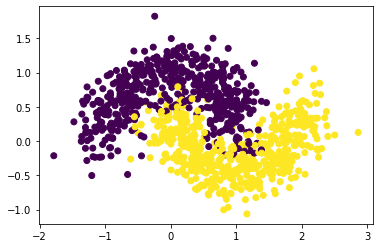

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
x, y = make_moons(n_samples=1000, noise=0.25)
plt.scatter(x[:,0], x[:,1],c=y)
plt.show()


//(b)

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

//(c)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train, y_train)
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(x_train, y_train)
knn140 = KNeighborsClassifier(n_neighbors=140)
knn140.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=140)

//(d)

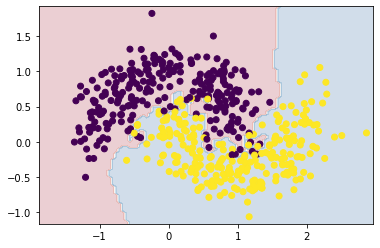

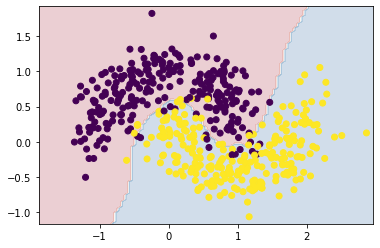

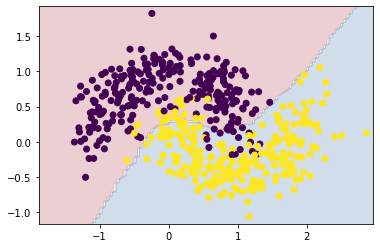

In [4]:
import numpy as np
x_min= x[:, 0].min() - 0.1
x_max=x[:, 0].max() + 0.1
y_min= x[:, 1].min() - 0.1
y_max=x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z1 = knn1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)

plt.contourf(xx, yy, Z1, cmap=plt.cm.RdBu, alpha=0.2)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.show()

Z20 = knn20.predict(np.c_[xx.ravel(), yy.ravel()])
Z20 = Z20.reshape(xx.shape)

plt.contourf(xx, yy, Z20, cmap=plt.cm.RdBu, alpha=0.2)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.show()

Z140 = knn140.predict(np.c_[xx.ravel(), yy.ravel()])
Z140 = Z140.reshape(xx.shape)

plt.contourf(xx, yy, Z140, cmap=plt.cm.RdBu, alpha=0.2)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.show()



//(e)

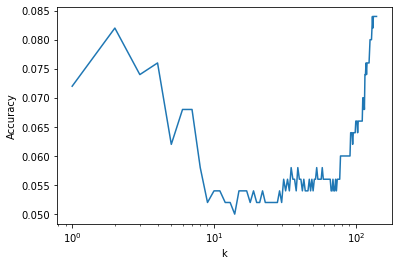

In [5]:
accuracy_list = []

for k in range(1, 141):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    train_accuracy = 1 - (sum(y_train_pred != y_train) / len(y_train))
    test_accuracy = 1 - (sum(y_test_pred != y_test) / len(y_test))
    accuracy_list.append([train_accuracy, test_accuracy])
    
plt.plot(range(1, 141),[1-a[1] for a in accuracy_list])
plt.xscale('log')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


(f)

k = 1

## 3) Participate in the Kaggle Titanic Machine Learning Challenge
**(4.5 points total)**

[Kaggle](https://en.wikipedia.org/wiki/Kaggle) is a platform that hosts machine learning competitions, notebooks, and datasets. This exercise will get you started with participating in Kaggle competitions, a skill you will need in week four of this course. 

**(a)**  Create an account on Kaggle and sent me your username via email. Your username has to be either your real name, your netid, or a pseudonym you sent him via email _before_ you open the account. If you already have a Kaggle account, you probably will have trouble to open a second one $\rightarrow$ sent me an email. (0.5 points)

Then participate in the [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview) competition. Download the test and training data from there.

[This video](https://www.youtube.com/watch?v=8yZMXCaFshs) can help you getting started. It's fine to get inspiration from existing notebooks. However, remember the copy fragments, not solutions policy. You need to write your Python code.  

**(b)**  Write a notebook that uses logistic regression, at least three different features, and 3 fold cross-validation. What is the accuracy? (1.5 points)

**(c)**  Use GridSearchCV to determine the best L2 regularization strength (switched on by default, hyperparameter: C ) Then make a prediction for the test data set. (1.5 points)

**(d)**  Make a submission of your test data prediction to the Titanic contest and document it with a screenshot of your position at the leaderboard. Your Ranking does not matter. Besides the notebook containing your code you need to submit that image to Sakai. (1 point)

**ANSWER**

See in the part 2